### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Data Collection and Processing

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Projects/Loan Status Prediction/train_data.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploring the Dataset

In [3]:
print("Shape of dataset:", dataset.shape)
dataset.describe()

Shape of dataset: (614, 13)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking for Missing Values

In [4]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


### Dropping Missing Values

In [5]:
dataset = dataset.dropna()
print("Shape after dropping missing values:", dataset.shape)

Shape after dropping missing values: (480, 13)


### Label Encoding for Loan_Status Column

In [6]:
label_encoder = LabelEncoder()
dataset['Loan_Status'] = label_encoder.fit_transform(dataset['Loan_Status'])
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


### Handling Dependents Column

In [7]:
# Replacing '3+' in 'Dependents' with 4 for consistency
dataset['Dependents'] = dataset['Dependents'].replace('3+', 4)
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

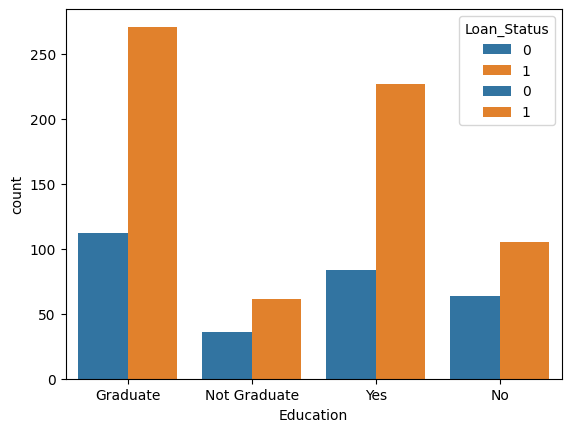

In [8]:
# Education & Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

# Marital Status & Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=dataset)

### Encoding Categorical Columns
Using OneHotEncoder and LabelEncoder for categorical values

In [9]:
# Label Encoding for binary categories
binary_columns = ['Married', 'Gender', 'Self_Employed', 'Education']
for col in binary_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# One-Hot Encoding for Property_Area (more than two categories)
dataset = pd.get_dummies(dataset, columns=['Property_Area'], drop_first=True)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,False,True


### Separating Features and Labels

In [10]:
X = dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = dataset['Loan_Status']

print("Features (X):")
print(X.head())
print("\nLabels (y):")
print(y.head())

Features (X):
   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          0              0             4583   
2       1        1          0          0              1             3000   
3       1        1          0          1              0             2583   
4       1        0          0          0              0             6000   
5       1        1          2          0              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area_Semiurban  Property_Area_Urban  
1                    False                False  
2       

### Splitting the Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

### Training the Model (Support Vector Machine)

In [12]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Evaluating the Model

In [13]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print('Accuracy on test data:', accuracy)

Accuracy on test data: 0.8125
